In [1]:
from PIL import Image
import numpy as np
import math
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

In [2]:
def show_images(images, size=(16, 8), mode='rgb', title=(None,None)): 
    if not isinstance(images, tuple) and not isinstance(images, list):
        images = [images]
        title = [title]
        
    if isinstance(mode, tuple) or isinstance(mode, list):
        change_mode = True
        
    else:
        current_mode = mode
        change_mode = False
            
    rows = math.ceil(len(images) / 2)
    fig=plt.figure(figsize=size, dpi=150)
    for i, img in enumerate(images):
        fig.add_subplot(rows, 2, i+1)
        
        if change_mode:
            current_mode = mode[i]

        if current_mode=='grayscale':
            plt.imshow(img, cmap='gray', vmin=0, vmax=255)
        else:
            plt.imshow(img)
            
        plt.title(title[i])
        plt.axis('off')

    plt.show()

In [3]:
def rgb_to_grayscale(np_img):
    return (0.3 * img_np[:,:,0]) + (0.59 * img_np[:,:,1]) + (0.11 * img_np[:,:,2])

# Загрузка изображения и преобразование цветного к полутоновому

In [4]:
img_pil = Image.open(input("Enter original image path: "))
img_np = np.asarray(img_pil)

Enter original image path: 2.png


In [5]:
# To grayscale
img_np_grayscale = rgb_to_grayscale(img_np)

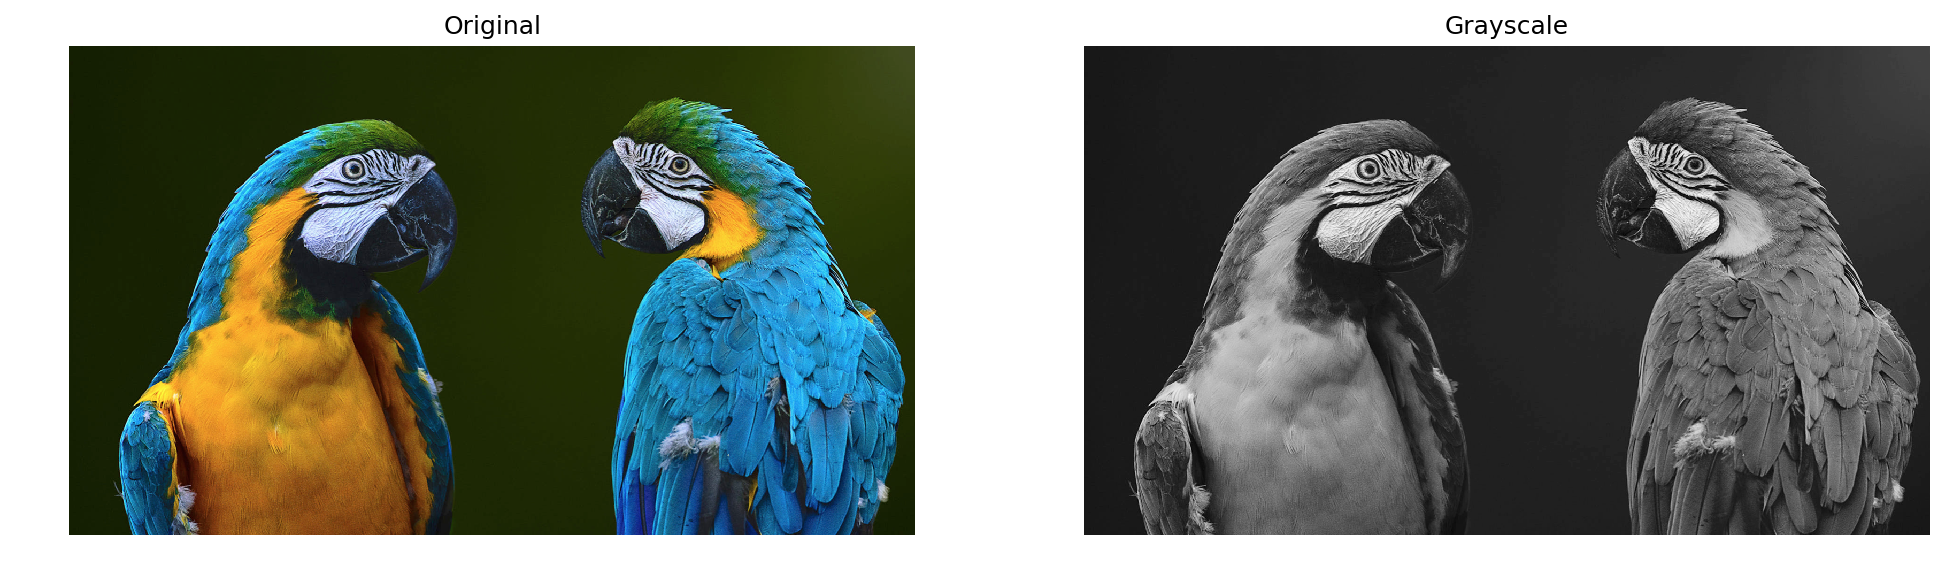

In [6]:
show_images((img_np, img_np_grayscale), 
            mode=('rgb', 'grayscale'), 
            title=('Original', 'Grayscale'))

# Квантование по яркости (с ручным заданием количества уровней)

In [18]:
def quantization_uniform(np_img, levels, trace=False):
    if trace: print('\n', str(levels), ' levels')
    temp = np.copy(np_img).astype('int')
    q = round(256 / levels) - 1
    for i in range(levels):
        mean_val = round(((i*q+i) + ((i+1)*q+i)) / 2)        
        temp[(temp>=(i*q+i)) & (temp<=((i+1)*q+i))] = mean_val
        
        if trace: 
            print('[',(i*q+i),':',((i+1)*q+i),'] -> ', mean_val)
    return temp


def quantization_uniform_rgb(np_img, levels, trace=False):
    temp = np.zeros(np_img.shape)
    if img_np.shape[2] == 4:
        temp[:,:,3] = np_img[:,:,3]
    for i in range(3):
        temp[:,:,i] = quantization_uniform(np_img[:,:,i], levels, trace)
    return temp.astype('int')


def quantization(np_img, levels, mode='grayscale', trace=False):
    images = []
    for level in levels:
        if mode == 'grayscale':
            images.append(quantization_uniform(np_img, level, trace))
        elif mode == 'rgb':
            images.append(quantization_uniform_rgb(np_img, level, trace))
        else: 
            images = None
    return images

## Grayscale image

In [19]:
quant_levels = [4, 8, 16, 32, 64]
quant_imgages = quantization(img_np_grayscale, quant_levels, trace=True)

# Append original image to beginning of list
quant_imgages.insert(0,img_np_grayscale)

# Create labels
quant_labels = ['Original grayscale']
for level in quant_levels:
    quant_labels.append(str(level) + ' levels')


 4  levels
[ 0 : 63 ] ->  32
[ 64 : 127 ] ->  96
[ 128 : 191 ] ->  160
[ 192 : 255 ] ->  224

 8  levels
[ 0 : 31 ] ->  16
[ 32 : 63 ] ->  48
[ 64 : 95 ] ->  80
[ 96 : 127 ] ->  112
[ 128 : 159 ] ->  144
[ 160 : 191 ] ->  176
[ 192 : 223 ] ->  208
[ 224 : 255 ] ->  240

 16  levels
[ 0 : 15 ] ->  8
[ 16 : 31 ] ->  24
[ 32 : 47 ] ->  40
[ 48 : 63 ] ->  56
[ 64 : 79 ] ->  72
[ 80 : 95 ] ->  88
[ 96 : 111 ] ->  104
[ 112 : 127 ] ->  120
[ 128 : 143 ] ->  136
[ 144 : 159 ] ->  152
[ 160 : 175 ] ->  168
[ 176 : 191 ] ->  184
[ 192 : 207 ] ->  200
[ 208 : 223 ] ->  216
[ 224 : 239 ] ->  232
[ 240 : 255 ] ->  248

 32  levels
[ 0 : 7 ] ->  4
[ 8 : 15 ] ->  12
[ 16 : 23 ] ->  20
[ 24 : 31 ] ->  28
[ 32 : 39 ] ->  36
[ 40 : 47 ] ->  44
[ 48 : 55 ] ->  52
[ 56 : 63 ] ->  60
[ 64 : 71 ] ->  68
[ 72 : 79 ] ->  76
[ 80 : 87 ] ->  84
[ 88 : 95 ] ->  92
[ 96 : 103 ] ->  100
[ 104 : 111 ] ->  108
[ 112 : 119 ] ->  116
[ 120 : 127 ] ->  124
[ 128 : 135 ] ->  132
[ 136 : 143 ] ->  140
[ 144 : 151 ] -> 

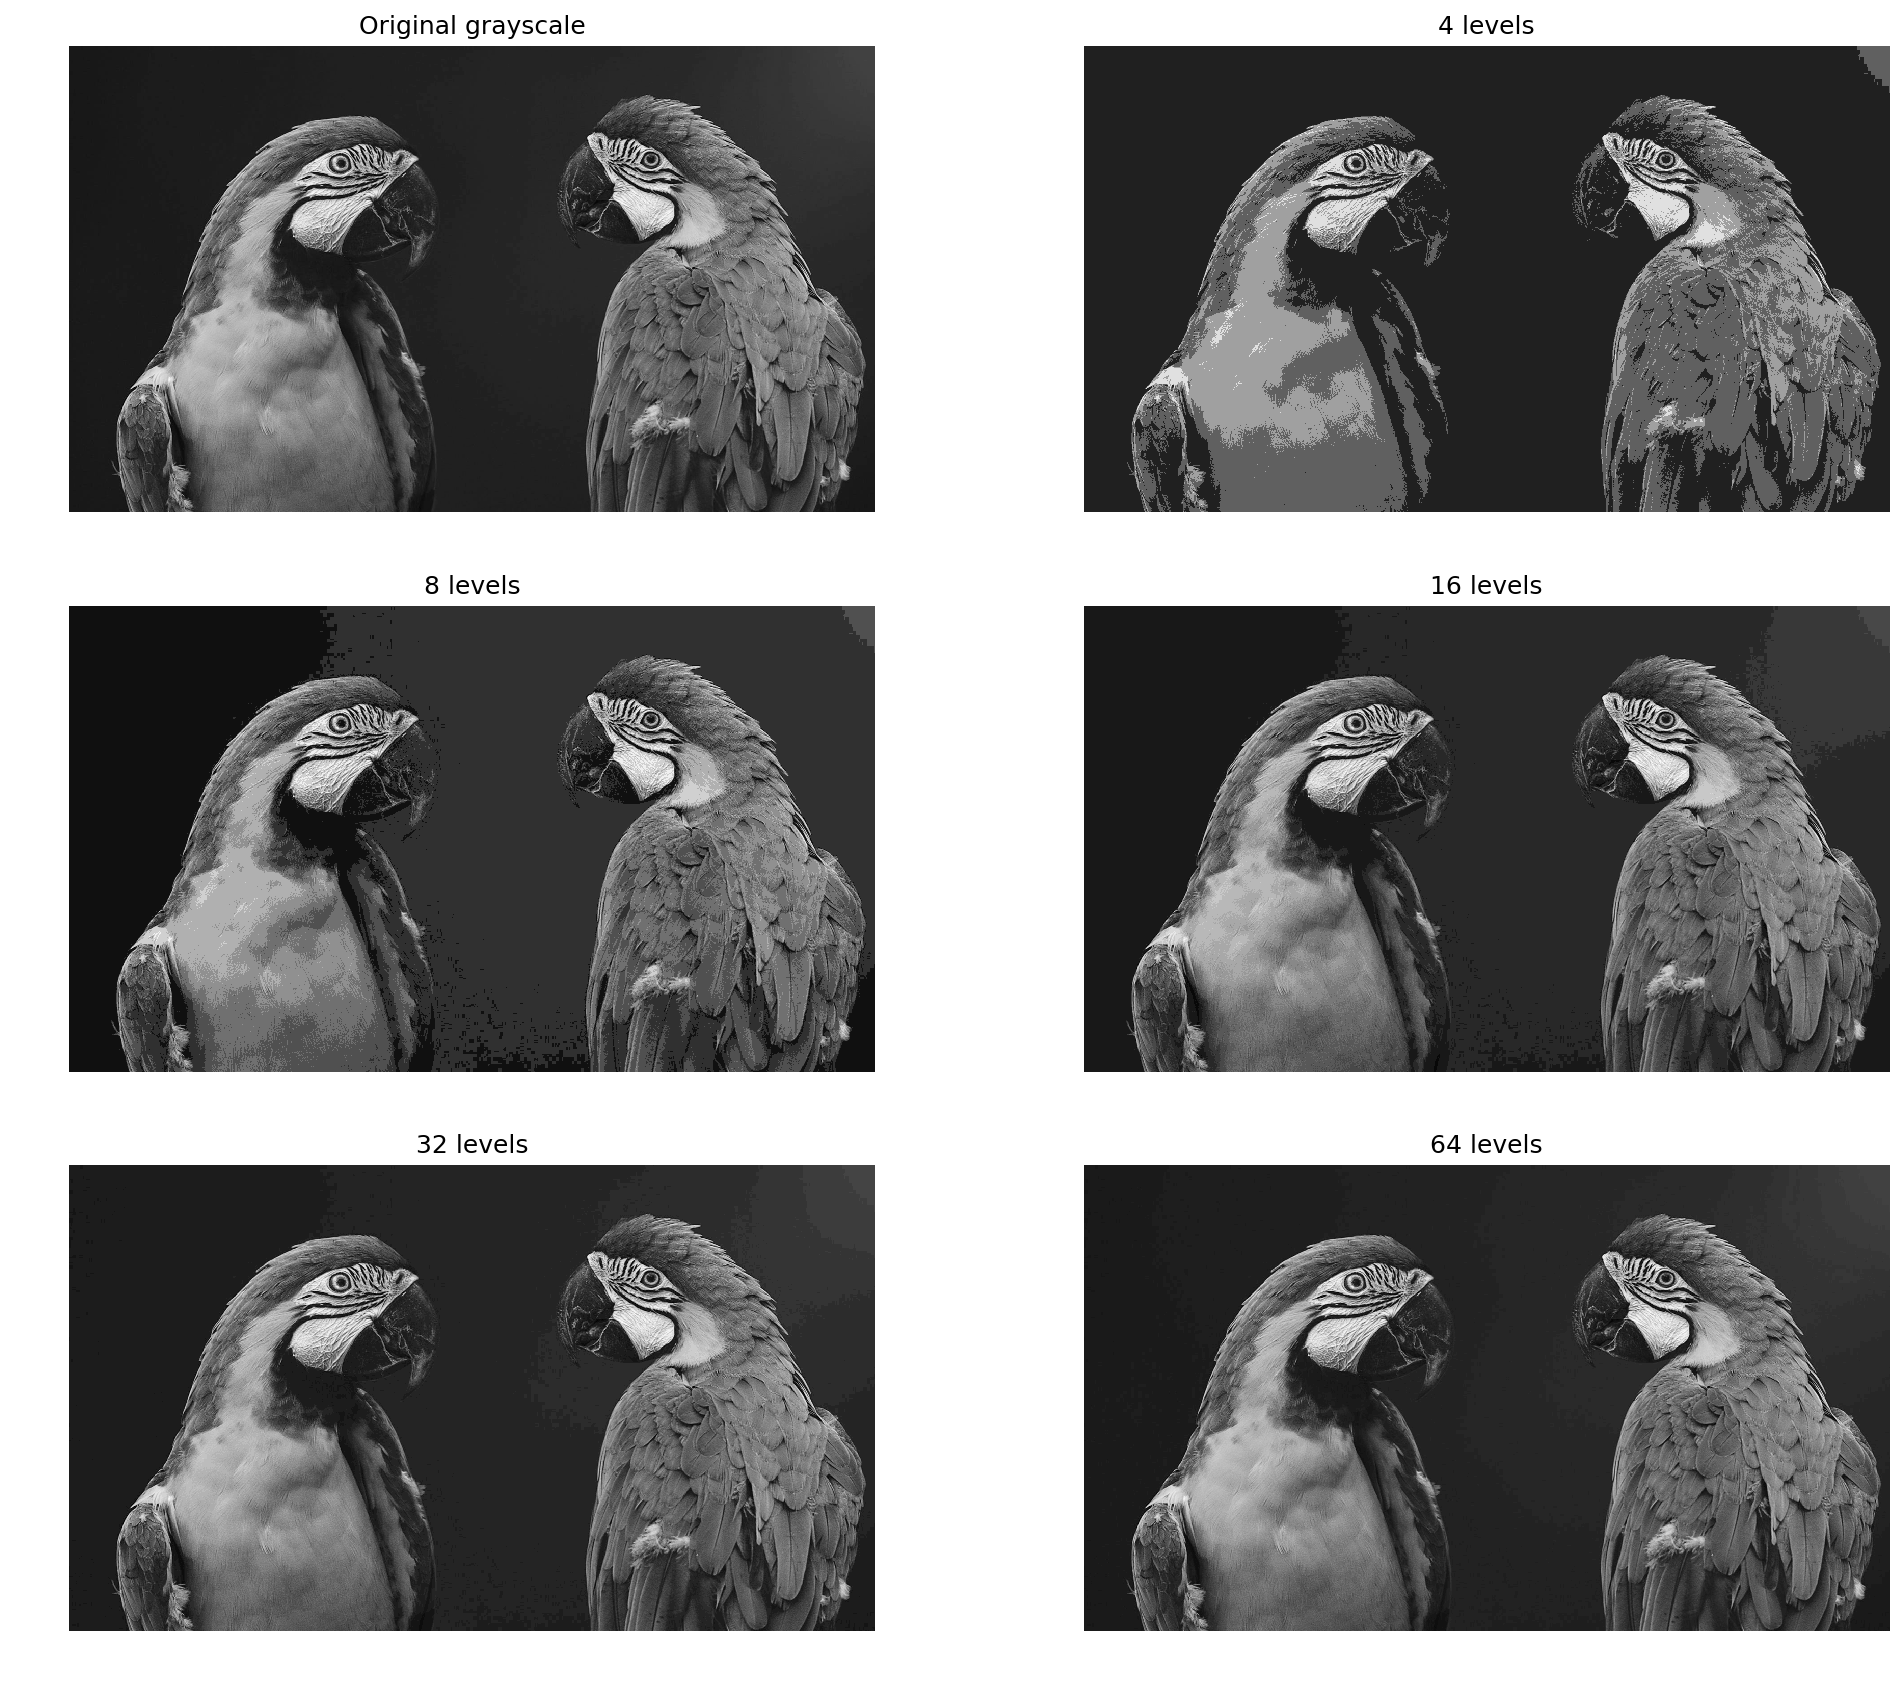

In [20]:
show_images(quant_imgages, size=(16, 14), mode='grayscale', title=quant_labels)

## RGB image

In [21]:
quant_levels = [4, 8, 16, 32, 64]
quant_imgages_rgb = quantization(img_np, quant_levels, mode='rgb')

# Append original image to beginning of list
quant_imgages_rgb.insert(0,img_np)

# Create labels
quant_labels = ['Original grayscale']
for level in quant_levels:
    quant_labels.append(str(level) + ' levels')

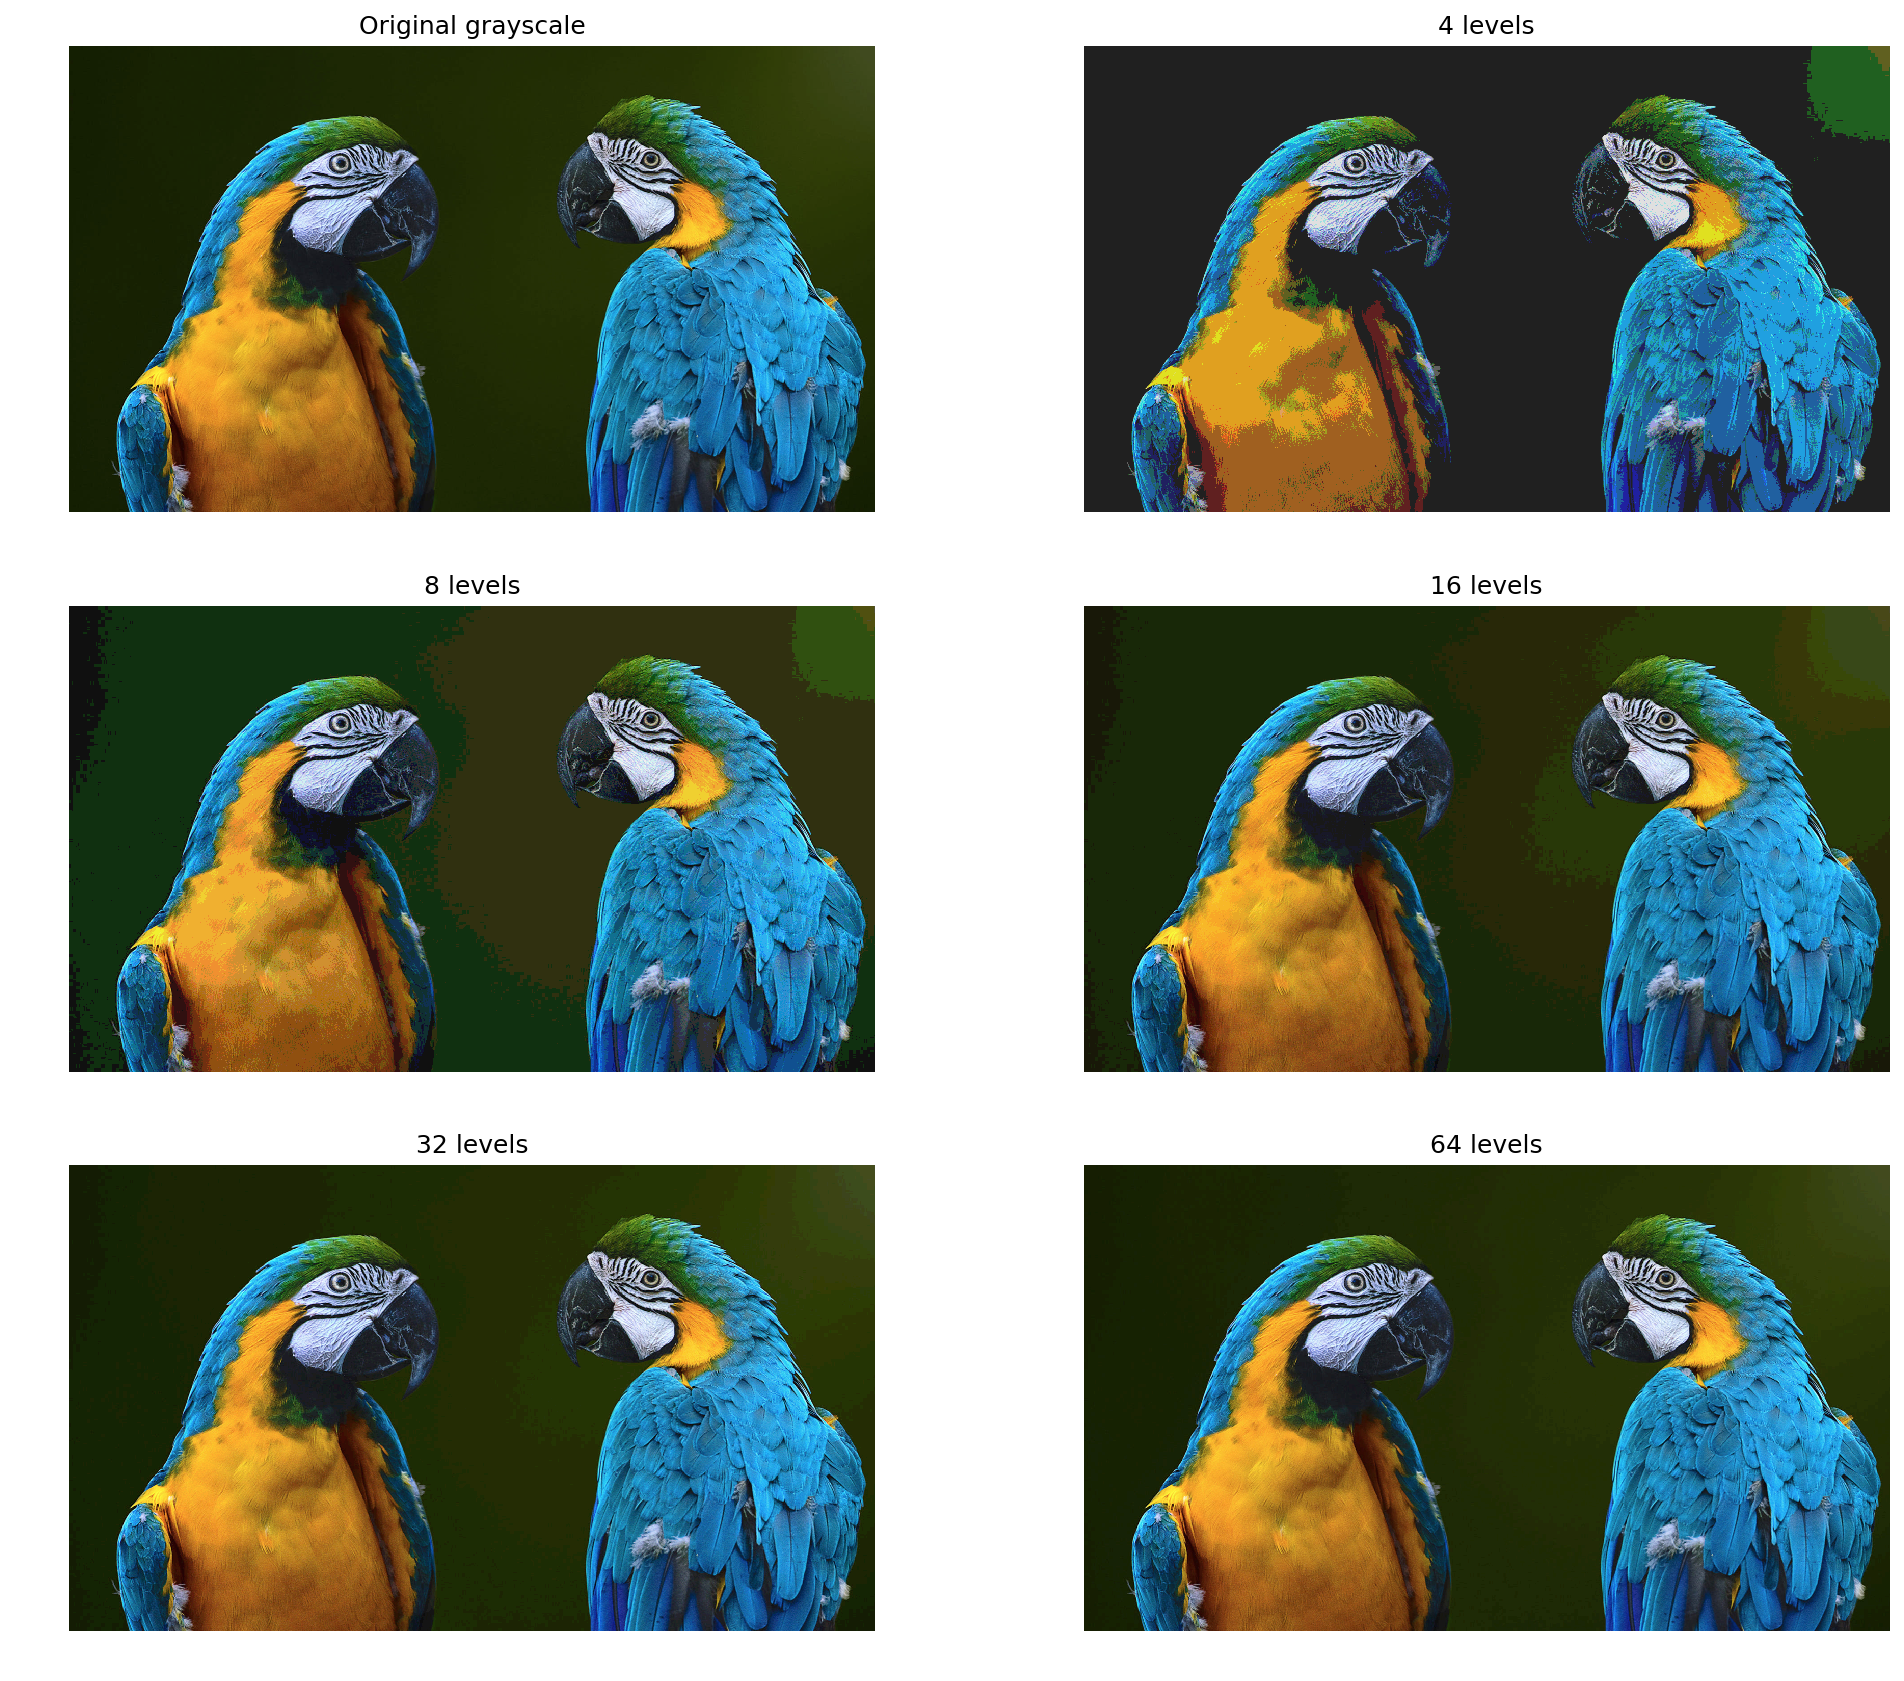

In [22]:
show_images(quant_imgages_rgb, size=(16, 14), title=quant_labels)